### Imports

- We will begin by importing basic python libraries like numpy and pandas.

- matplotlib.pyplot and seaborn for plotting.

- The mnist dataset is downloaded using fetch_openml library.

- The MLPClassifier is imported from sklearn.neural_network module.

- The model training and evaluation is performed with cross validation using a bunch of model selection utilities like cross_val_score,
train_test_split, StratifiedShuffleSplit etc.

- The performance on the test samples is obtained via accuracy_score, confusion_matrix and classification_report.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, \
ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import cross_val_score, train_test_split, \
GridSearchCV, StratifiedShuffleSplit

In [4]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

### Load Dataset

In [6]:
# Load dataset
X,y= fetch_openml('mnist_784',version=1,return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[ : 60000], X[ 60000: ], y[ : 60000], y[ 60000 : ]

In [7]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [8]:
# Normalizing.
X_train = X_train/255
X_test = X_test/255

In [9]:
print('Shape of training data after flattening',X_train.shape)
print('Shape of testing data after flattening', X_test.shape)

Shape of training data after flattening (60000, 784)
Shape of testing data after flattening (10000, 784)


In [10]:
print('Shape of training data', X_train.shape)
print('Shape of training labels', y_train.shape)
print ('Shape of testing data', X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (60000, 784)
Shape of training labels (60000,)
Shape of testing data (10000, 784)
Shape of testing labels (10000,)


## Fit MLPClassifer on MNIST dataset
- Let us train a MLP classifier with one hidden layer having 128 neurons.

In [11]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [12]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel (), cv=cv)
print("Training Accuracy: {:.2f} %".format(cv_score.mean()*100) )

Training Accuracy: 97.47 %


In [13]:
# prediction probabilities of test data
mlpc.predict_proba(X_test[:5])

array([[3.50908343e-13, 1.36704711e-19, 9.64059658e-12, 1.45515694e-07,
        1.76084060e-21, 8.93317997e-14, 1.13964441e-18, 9.99999741e-01,
        3.65433676e-12, 1.13264677e-07],
       [3.47288475e-15, 2.64474378e-09, 9.99999997e-01, 3.93185197e-11,
        1.47350579e-23, 2.69706680e-11, 3.59609102e-15, 3.57812558e-22,
        1.94723229e-10, 6.51389725e-20],
       [1.05461002e-14, 9.99990469e-01, 3.56759118e-07, 2.85369580e-10,
        5.48907425e-08, 7.36995672e-10, 2.79824854e-08, 4.09047556e-07,
        8.68130641e-06, 6.95844528e-15],
       [1.00000000e+00, 8.26201658e-23, 3.19594740e-13, 4.38406587e-16,
        1.14554627e-20, 1.95475319e-14, 2.22765238e-12, 1.93208248e-11,
        6.43410670e-20, 9.39977478e-15],
       [5.28140880e-13, 1.53237673e-18, 2.10878797e-11, 9.09712560e-17,
        9.99998594e-01, 2.40783134e-15, 1.75456065e-11, 4.79180104e-11,
        1.61484870e-10, 1.40623673e-06]])

In [14]:
# prediction class labels of test data
y_pred = mlpc.predict(X_test)

In [15]:
print(
    "Train accuracy: {:.2f} %".format(
        accuracy_score(y_train, mlpc.predict(X_train)) * 100
    )
)
print("Test accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

Train accuracy: 100.00 %
Test accuracy: 97.92 %


## Confusion matrix plot

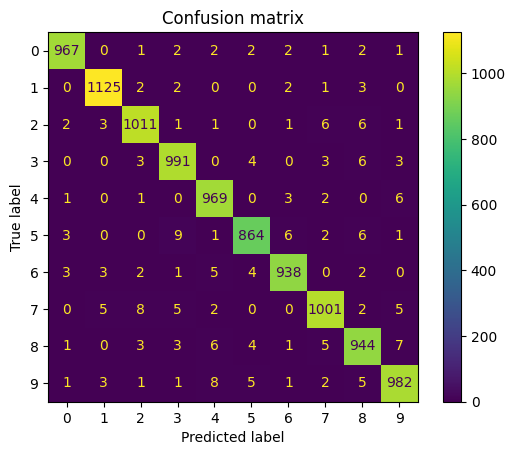

In [16]:
# visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()

In [17]:
CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Plot of test data along with predicted class labels

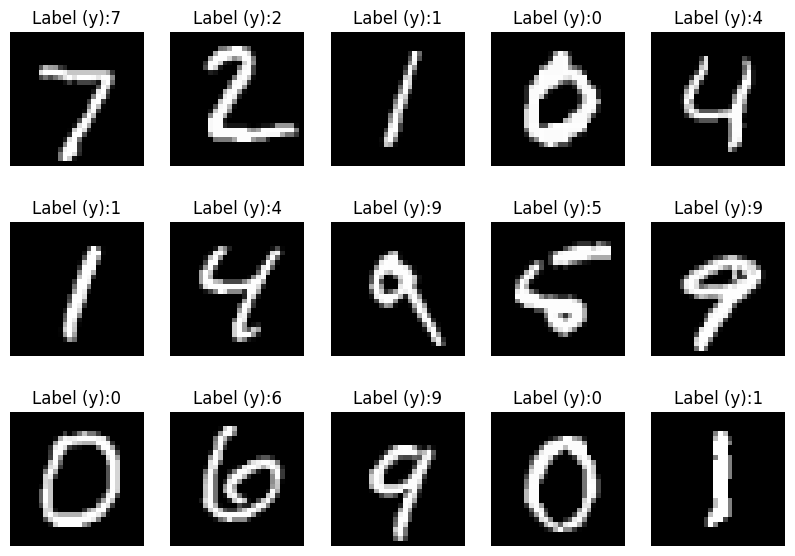

In [18]:
# Plotting some test samples and
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y):{y}'.format (y=y_pred[i]))
    plt.axis('off')

## Visualization of multi layer perceptron weights in hidden layer

- Looking at the learned coefficients of a neural network can provide insight into the learning behavior.

- The input data consists 784 features in the dataset.

- We have used one hidden layer with 128 neurons. Therefore weight matrix has the shape (784, 128).

- We can therefore visualize a single column of the weight matrix as a 28 x 28 pixel image.

In [19]:
w = mlpc.coefs_
w = np. array (w[0])
w.shape

(784, 128)

In [20]:
w1 = np.array(w[:,0])
w1.shape

(784,)

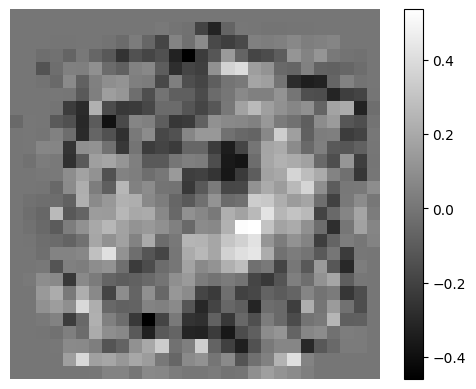

In [21]:
w_matrix = w1.reshape(28,28)
fig = plt.figure()
plt. imshow (w_matrix, cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()

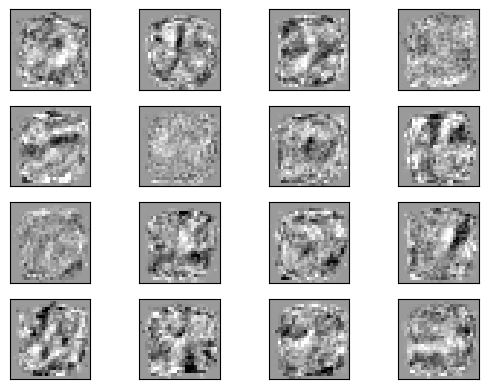

In [22]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()
for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

Text(0.5, 1.0, 'Loss curve')

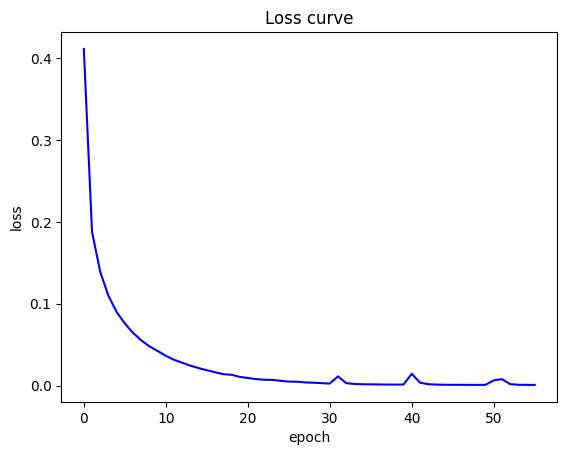

In [23]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')